In [ ]:
#from keras.preprocessing import image
#from keras_preprocessing.image import img_to_array
#from keras.applications.vgg19 import preprocess_input
#from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
from keras.layers import GlobalAveragePooling2D, Dense  # Dropout, Input, normalization, Flatten, AveragePooling2D,
from keras.models import Model # Sequential,

#from keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from keras import layers
import tensorflow as tf
#import streamlit

#import pandas as pd
from google.colab import drive




In [ ]:
dire = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/train'
test_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/test'
val_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range=10, zoom_range=0.3, horizontal_flip=True, vertical_flip=True,brightness_range=[0.5,2.0], width_shift_range = 0.2,rotation_range=20,fill_mode = 'nearest')
test_val_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:
train = train_datagen.flow_from_directory(train_direc,batch_size=32, class_mode='binary') #target_size=(224,224,3)

test = test_val_datagen.flow_from_directory(test_direc,batch_size=2,class_mode='binary') #target_size=(224,224,3)

validation = test_val_datagen.flow_from_directory(val_direc,batch_size=2,class_mode='binary') #target_size=(224,224,3)

Found 5247 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
 # colocando todas as layers da vgg19
def vgg_layers():
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    vgg.trainable = False

    x = vgg.output          #outputs = [vgg.get_layer(name).output for name in layer_names]
    x = GlobalAveragePooling2D()(x)
    x = Dense(128,activation='relu')(x)

    predictions = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=vgg.input, outputs=predictions)        # model = tf.keras.Model([vgg.input],outputs)

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])     # Compile
    return model

In [ ]:
model = vgg_layers()

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#early stopping
stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) #verbose=2, patience=10

# Learing rete
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)


In [ ]:
history = model.fit(train,epochs=30, validation_data=validation, steps_per_epoch=100, callbacks=[stopper,lr], batch_size=32)

Epoch 1/40
100/100 [==============================] - 2520s 25s/step - loss: 0.5599 - accuracy: 0.7234 - val_loss: 0.6418 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/40
100/100 [==============================] - 982s 10s/step - loss: 0.4433 - accuracy: 0.7871 - val_loss: 0.4778 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/40
100/100 [==============================] - 421s 4s/step - loss: 0.4012 - accuracy: 0.8224 - val_loss: 0.5848 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/40
100/100 [==============================] - 227s 2s/step - loss: 0.3692 - accuracy: 0.8303 - val_loss: 0.4339 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/40
100/100 [==============================] - 151s 2s/step - loss: 0.3572 - accuracy: 0.8372 - val_loss: 0.4463 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/40
100/100 [==============================] - 104s 1s/step - loss: 0.3518 - accuracy: 0.8356 - val_loss: 0.4243 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/40
100/100 [==============================] - 94s 936

Text(0, 0.5, 'Loss')

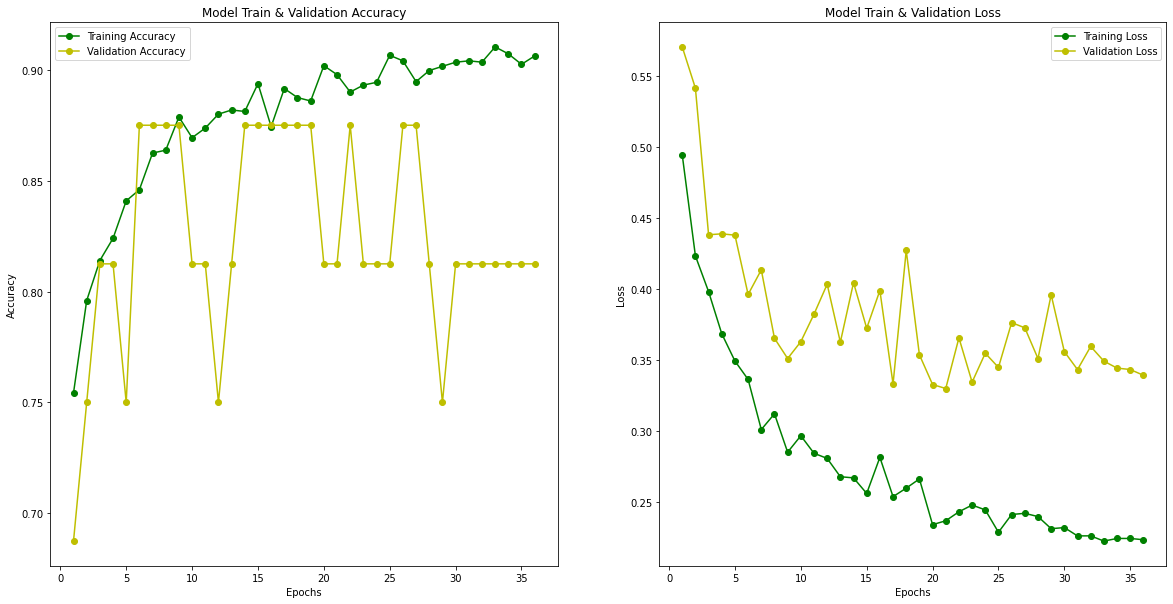

In [ ]:
#Plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [ ]:
model.save_weights('primeiro_treino')

In [ ]:
model.save('rede_xray')

In [ ]:
test_accu = model.evaluate(test)

print('The testing accuracy is: ', test_accu[1]*100, "%")

312/312 [==============================] - 463s 1s/step - loss: 0.3132 - accuracy: 0.8814
The testing accuracy is:  88.14102411270142 %


In [ ]:
preds = model.predict(test,verbose=1)

312/312 [==============================] - 9s 28ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

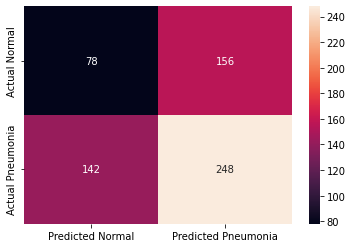

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.35      0.33      0.34       234
   PNEUMONIA       0.61      0.64      0.62       390

    accuracy                           0.52       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.52      0.52      0.52       624

